In [121]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [122]:
# PASO DEL TIEMPO
h=0.1 # intervalos de tiempo son cada 0,1 millones de años
t=100 # El tiempo está medido en millones de años
n=int(t/h)

T = np.linspace(0, t, num=n) # Modelamos el tiempo entre 0 y 100 (a partir de lo anterior, donde definimos t = 100)
k_1 = [10,8,8,8,8,8]
k_2 = [10,15,15,15,15,15]
alpha =  [1.0,1.2,1.5,1.9,2.0,2.1]
a_0 = [0.15,0.4,0.4,0.4,0.4,0.4]
m_0 = [0.15,0.3,0.3,0.3,0.3,0.3]

In [123]:
n_c = 5 # n_c representa la fila de la tabla (-1) del enunciado que estamos analizando

In [124]:
# Definimos las derivadas de a, m y s.
# La derivada de s se obtiene a partir de la ecuación a + m + s = 1. Quedando así s = 1 - m - a.
# Luego, derivando aquello se obtiene que s' = k_2[n_c] * m ** alpha[n_c] * s -s
def s_prime(n_c, s, m):
    return k_2[n_c] * m ** alpha[n_c] * s - s
def a_prime(n_c,a,m,s):
    return s-k_1[n_c]*m**2*a
def m_prime(n_c,a,m,s):
    return k_1[n_c]*m**2*a-k_2[n_c]*m**alpha[n_c]*s

# ARREGLOS
# Las listas a, m y s son las listas donde se guardan los valores que generan las funciones (es decir, el eje Y).
# Debido al Euler, debemos generar una lista conformada por n ceros, para luego ser rellenada.
a = [0]*n
m = [0]*n
s = [0]*n

# Definimos a(0), m(0) y s(0) para cualquier fila de la tabla, para no generar confusiones en el programa
a[0] = a_0[n_c]
m[0] = m_0[n_c]
s[0] = 1 - a[0] - m[0]

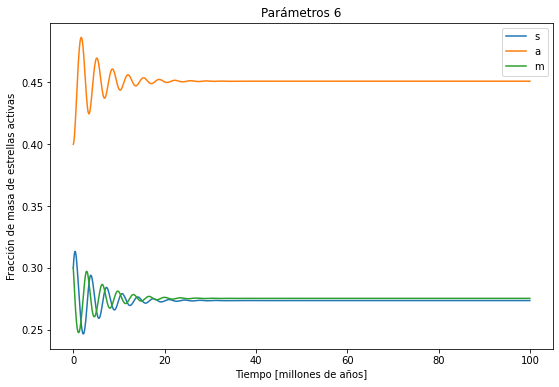

In [125]:
# MÉTODO EULER PROGRESIVO
# Se crea una iteración para recorrer cada elemento de los vectores, para obtener así sus valores
for i in range(len(T)-1):
    a[i+1]=a_prime(n_c,a[i],m[i], s[i])*h+a[i]
    m[i+1]=m_prime(n_c,a[i],m[i], s[i])*h+m[i]
    s[i+1]=s_prime(n_c,s[i],m[i])*h+s[i]

# Creamos el gráfico con a, m y s superpuestas. Este gráfico variará según el valor de n_c
fig = plt.figure(figsize=(9,6))

plt.plot(T,s, label='s')
plt.plot(T,a, label='a')
plt.plot(T,m, label='m')
plt.title("Parámetros "+str(n_c+1))
plt.xlabel("Tiempo [millones de años]")
plt.ylabel("Fracción de masa de estrellas activas")
plt.legend()
plt.savefig("Parámetros "+str(n_c+1))